Import packages

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam


Load data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Analysing data

In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

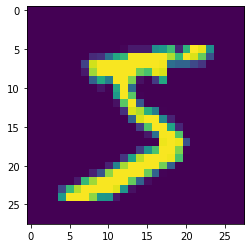

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [9]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Model creating

In [10]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [11]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

Train the model

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 228s 122ms/step - loss: 0.0747 - accuracy: 0.9768 - val_loss: 0.0876 - val_accuracy: 0.9748
Epoch 2/5
1875/1875 [==============================] - 230s 123ms/step - loss: 0.0481 - accuracy: 0.9846 - val_loss: 0.0826 - val_accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 231s 123ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0969 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 228s 122ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.1203 - val_accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 226s 120ms/step - loss: 0.0220 - accuracy: 0.9934 - val_loss: 0.0996 - val_accuracy: 0.9789


Test the model

In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09961985796689987, 0.9789000153541565]


In [15]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 144ms/step
[[1.3874759e-11 7.1353511e-22 1.1345337e-13 6.9845024e-10 1.6184448e-20
  1.6553810e-13 3.5922641e-21 1.0000000e+00 1.3550087e-12 5.3450090e-14]
 [7.5704564e-12 4.9531837e-12 1.0000000e+00 1.7421982e-14 1.1458294e-20
  1.1895288e-15 1.5719514e-12 1.3664650e-19 6.2629277e-12 2.9539903e-22]
 [7.6322904e-09 9.9999428e-01 4.6589648e-08 2.5792172e-13 2.1921910e-06
  7.9951237e-09 8.8715715e-11 1.1172130e-09 3.4313534e-06 3.0968516e-12]
 [1.0000000e+00 6.7602234e-16 1.4745115e-11 2.0581998e-16 3.5428066e-15
  7.7343981e-14 7.2004132e-11 1.6106823e-15 1.5290724e-12 4.5449912e-13]]


In [16]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
